In [2]:
%pip install tensorboard
%pip install fastai

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import json
import pandas as pd

In [4]:
marine_life_classes = ["Actinopterygii"]

""" marine_life_classes = [
    "Actinopterygii",
    "Gastropoda",
    "Malacostraca",
    "Bivalvia",
    "Anthozoa",
    "Elasmobranchii",
    "Asteroidea",
    "Polyplacophora",
    "Hexanauplia",
    "Echinoidea",
    "Scyphozoa",
    "Cephalopoda",
    "Hydrozoa",
    "Ascidiacea",
    "Holothuroidea",
    "Ophiuroidea",
] """

train_data = 'train_mini/train_mini'
annotation_json = 'train_mini.json'

In [5]:
df = pd.DataFrame()

with open(annotation_json) as f:
    data = json.load(f)

    rows = [category_info.values() for category_info in data["categories"]]
    df = pd.DataFrame(rows, columns=data["categories"][0].keys())

In [6]:
df

,id,name,common_name,supercategory,kingdom,phylum,class,order,family,genus,specific_epithet,image_dir_name
0,0,Lumbricus terrestris,Common Earthworm,Animalia,Animalia,Annelida,Clitellata,Haplotaxida,Lumbricidae,Lumbricus,terrestris,00000_Animalia_Annelida_Clitellata_Haplotaxida...
1,1,Sabella spallanzanii,Mediterranean Fanworm,Animalia,Animalia,Annelida,Polychaeta,Sabellida,Sabellidae,Sabella,spallanzanii,00001_Animalia_Annelida_Polychaeta_Sabellida_S...
2,2,Serpula columbiana,Serpula columbiana,Animalia,Animalia,Annelida,Polychaeta,Sabellida,Serpulidae,Serpula,columbiana,00002_Animalia_Annelida_Polychaeta_Sabellida_S...
3,3,Spirobranchus cariniferus,Blue Tube Worm,Animalia,Animalia,Annelida,Polychaeta,Sabellida,Serpulidae,Spirobranchus,cariniferus,00003_Animalia_Annelida_Polychaeta_Sabellida_S...
4,4,Eratigena duellica,Giant House Spider,Arachnids,Animalia,Arthropoda,Arachnida,Araneae,Agelenidae,Eratigena,duellica,00004_Animalia_Arthropoda_Arachnida_Araneae_Ag...
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,Psilotum nudum,skeleton fork fern,Plants,Plantae,Tracheophyta,Polypodiopsida,Psilotales,Psilotaceae,Psilotum,nudum,09995_Plantae_Tracheophyta_Polypodiopsida_Psil...
9996,9996,Tmesipteris elongata,Tmesipteris elongata,Plants,Plantae,Tracheophyta,Polypodiopsida,Psilotales,Psilotaceae,Tmesipteris,elongata,09996_Plantae_Tracheophyta_Polypodiopsida_Psil...
9997,9997,Azolla filiculoides,water fern,Plants,Plantae,Tracheophyta,Polypodiopsida,Salviniales,Salviniaceae,Azolla,filiculoides,09997_Plantae_Tracheophyta_Polypodiopsida_Salv...
9998,9998,Salvinia minima,water spangles,Plants,Plantae,Tracheophyta,Polypodiopsida,Salviniales,Salviniaceae,Salvinia,minima,09998_Plantae_Tracheophyta_Polypodiopsida_Salv...


In [7]:
df["class"].unique()

array(['Clitellata', 'Polychaeta', 'Arachnida', 'Chilopoda', 'Diplopoda',
       'Hexanauplia', 'Insecta', 'Malacostraca', 'Merostomata',
       'Actinopterygii', 'Amphibia', 'Ascidiacea', 'Aves',
       'Elasmobranchii', 'Mammalia', 'Reptilia', 'Anthozoa', 'Hydrozoa',
       'Scyphozoa', 'Asteroidea', 'Echinoidea', 'Holothuroidea',
       'Ophiuroidea', 'Bivalvia', 'Cephalopoda', 'Gastropoda',
       'Polyplacophora', 'Arthoniomycetes', 'Dothideomycetes',
       'Lecanoromycetes', 'Leotiomycetes', 'Pezizomycetes',
       'Sordariomycetes', 'Agaricomycetes', 'Dacrymycetes',
       'Pucciniomycetes', 'Tremellomycetes', 'Bryopsida',
       'Polytrichopsida', 'Sphagnopsida', 'Ulvophyceae',
       'Jungermanniopsida', 'Marchantiopsida', 'Florideophyceae',
       'Cycadopsida', 'Gnetopsida', 'Liliopsida', 'Lycopodiopsida',
       'Magnoliopsida', 'Pinopsida', 'Polypodiopsida'], dtype=object)

In [8]:
df[df["name"] == "Tursiops truncatus"]

,id,name,common_name,supercategory,kingdom,phylum,class,order,family,genus,specific_epithet,image_dir_name
4660,4660,Tursiops truncatus,Bottlenose Dolphin,Mammals,Animalia,Chordata,Mammalia,Artiodactyla,Delphinidae,Tursiops,truncatus,04660_Animalia_Chordata_Mammalia_Artiodactyla_...


In [9]:
df["class"].value_counts()

class
Magnoliopsida        3295
Insecta              2526
Aves                 1486
Liliopsida            674
Reptilia              313
Mammalia              246
Agaricomycetes        245
Actinopterygii        183
Amphibia              170
Arachnida             153
Polypodiopsida        140
Gastropoda            122
Pinopsida              86
Lecanoromycetes        55
Malacostraca           54
Bivalvia               33
Bryopsida              30
Lycopodiopsida         20
Anthozoa               17
Elasmobranchii         16
Pezizomycetes          13
Asteroidea             11
Polyplacophora          9
Sordariomycetes         7
Florideophyceae         7
Hexanauplia             7
Echinoidea              7
Diplopoda               6
Leotiomycetes           6
Scyphozoa               6
Cephalopoda             5
Dacrymycetes            5
Chilopoda               5
Marchantiopsida         5
Tremellomycetes         4
Polytrichopsida         4
Ulvophyceae             4
Pucciniomycetes         3
Hydroz

In [10]:
df[df["class"].isin(marine_life_classes)]["common_name"].unique()

array(['Bowfin', 'American Eel', 'Green Moray', 'Sergeant Baker',
       'American Gizzard Shad', 'White Sucker', 'Central Stoneroller',
       'Goldfish', 'Common Carp', 'Amur Carp', 'Striped Shiner',
       'Common Shiner', 'Golden Shiner', 'Bluntnose Minnow',
       'Blacknose Dace', 'Rudd', 'Creek Chub', 'Chub',
       'Sheepshead Minnow', 'banded killifish', 'Mummichog',
       'Blackstripe Topminnow', 'Western Mosquitofish',
       'Eastern Mosquitofish', 'Atlantic Tarpon', 'Northern Pike',
       'Chain Pickerel', 'Brook stickleback', 'Three-spined Stickleback',
       'Northern Clingfish', 'Spotted Gar', 'Longnose Gar', 'Florida Gar',
       'Flathead Mullet', 'Atlantic Blue Tang', 'Brown Surgeonfish',
       'Orangeband Surgeonfish', 'Convict Surgeonfish',
       'Orangespine Unicornfish', 'Yellow Tang', 'Sydney Cardinalfish',
       'Silver Trevally', 'Yellowtail Scad', 'Redeye Bass',
       'Redbreast Sunfish', 'Green Sunfish', 'Pumpkinseed Sunfish',
       'Warmouth Sunfish

In [11]:
df = df[df["class"].isin(marine_life_classes)]

In [12]:
from fastai.vision.all import *
from fastai.callback.tensorboard import TensorBoardCallback
import os

In [13]:
extraction_folders = set(df["image_dir_name"].unique())

extraction_folders

{'02756_Animalia_Chordata_Actinopterygii_Amiiformes_Amiidae_Amia_calva',
 '02757_Animalia_Chordata_Actinopterygii_Anguilliformes_Anguillidae_Anguilla_rostrata',
 '02758_Animalia_Chordata_Actinopterygii_Anguilliformes_Muraenidae_Gymnothorax_prasinus',
 '02759_Animalia_Chordata_Actinopterygii_Aulopiformes_Aulopidae_Latropiscis_purpurissatus',
 '02760_Animalia_Chordata_Actinopterygii_Clupeiformes_Clupeidae_Dorosoma_cepedianum',
 '02761_Animalia_Chordata_Actinopterygii_Cypriniformes_Catostomidae_Catostomus_commersonii',
 '02762_Animalia_Chordata_Actinopterygii_Cypriniformes_Cyprinidae_Campostoma_anomalum',
 '02763_Animalia_Chordata_Actinopterygii_Cypriniformes_Cyprinidae_Carassius_auratus',
 '02764_Animalia_Chordata_Actinopterygii_Cypriniformes_Cyprinidae_Cyprinus_carpio',
 '02765_Animalia_Chordata_Actinopterygii_Cypriniformes_Cyprinidae_Cyprinus_rubrofuscus',
 '02766_Animalia_Chordata_Actinopterygii_Cypriniformes_Cyprinidae_Luxilus_chrysocephalus',
 '02767_Animalia_Chordata_Actinopterygii

In [14]:
import tarfile

members = []

""" with tarfile.open("train_mini.tar.gz", "r:gz") as archive:
    members = archive.getmembers() """

' with tarfile.open("train_mini.tar.gz", "r:gz") as archive:\n    members = archive.getmembers() '

In [15]:
""" print(members[1].name.split("/")[-1])

filtered_members = [
    member
    for member in members
    if len(member.name.split("/")) > 1 and member.name.split("/")[1] in extraction_folders
]

top_members = [member.name for member in members]

len(filtered_members)

print(filtered_members) """

IndexError: list index out of range

In [189]:
""" with tarfile.open("train_mini.tar.gz", "r:gz") as archive:
    archive.extractall("train_data", members=filtered_members) """

/tmp/ipykernel_51819/629273536.py:2: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  archive.extractall("train_data", members=filtered_members)


In [16]:
path = Path("train_data")

In [32]:
batch_tfms = [
    ToTensor(),
    *aug_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.0),
    Normalize(),
]
cells = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(256),
    batch_tfms=batch_tfms,
)

dls = cells.dataloaders(path / "train_mini", bs=128)

In [ ]:
test_dls = dls.test_dl(
    get_image_files("test_data/"), bs=32, with_labels=True
)

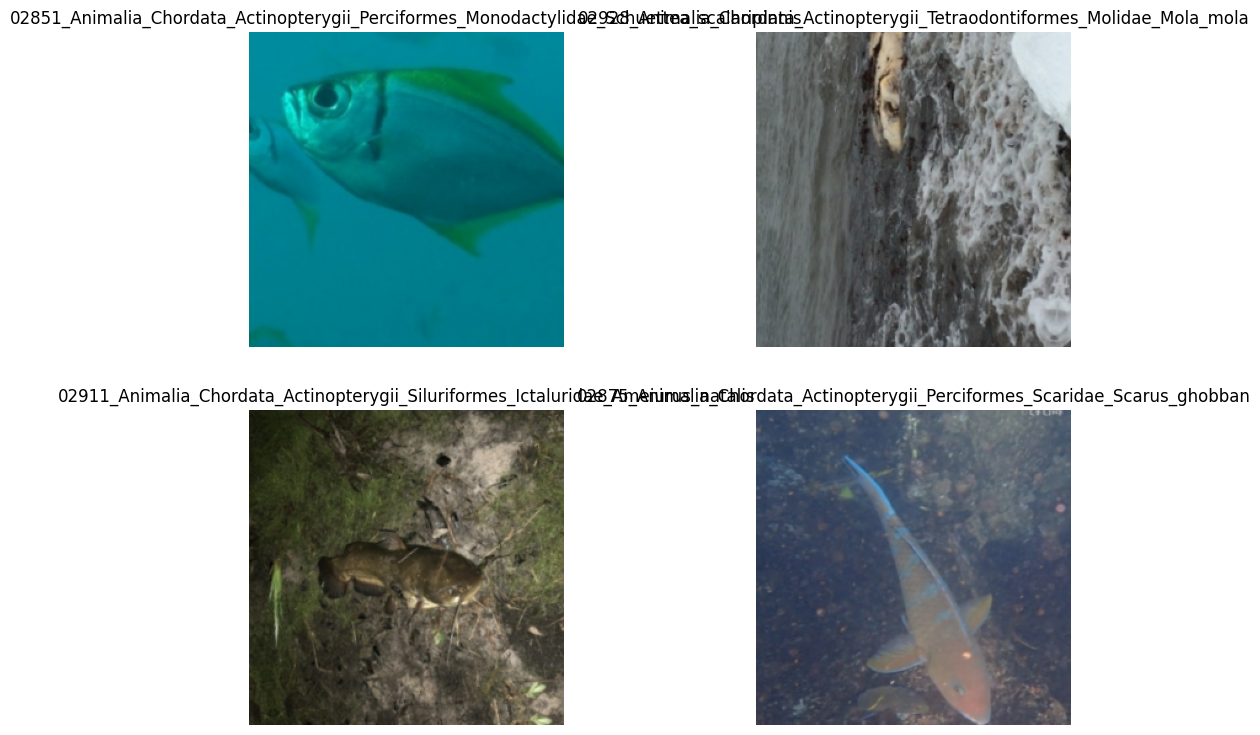

In [33]:
dls.show_batch(max_n=4, figsize=(12, 9))

In [37]:
xb, yb = dls.one_batch()

# Confirm that the shape of the data is correct

In [38]:
xb.shape, yb.shape  

(torch.Size([128, 3, 256, 256]), torch.Size([128]))

In [39]:
# See number of classes
dls.c

183

# Covolutional Neural Network

We start by defining methods to create a convolutional neural network. The first method creates a convolutional layer with a kernel size of 3 and a stride of 2. The second method creates a ResBlock which is a BatchNormalization and ReLU function mixed in one. The third method creates a fully connected layer using the above two methods while adding a dropout layer to prevent overfitting and also a AdaptiveAvgPool2d layer to reduce the size of the image to 1x1 before passing it to AdaptiveMaxPool2d layer. The final layer is a linear layer withou any activation function.

In [40]:
def conv2(ni, nf):
    return ConvLayer(ni, nf, stride=2)

In [41]:
class ResBlock(Module):
    def __init__(self, nf):
        self.conv1 = ConvLayer(nf, nf)
        self.conv2 = ConvLayer(nf, nf)

    def forward(self, x):
        return x + self.conv2(self.conv1(x))

In [42]:
def simple_cnn():
    return nn.Sequential(
        conv2(3, 16),
        ResBlock(16),
        conv2(16, 32),
        ResBlock(32),
        conv2(32, 64),
        ResBlock(64),
        nn.AdaptiveAvgPool2d(1),
        nn.AdaptiveMaxPool2d(1),
        Flatten(),
        nn.BatchNorm1d(64),
        nn.Dropout(0.25),
        nn.Linear(64, 4),
    )

In [43]:
learn = Learner(
    dls,
    simple_cnn(),
    loss_func=CrossEntropyLossFlat(),
    metrics=[accuracy],
    cbs=ActivationStats(with_hist=True),
)

In [44]:
learn.summary()

/home/natesawant/miniconda3/lib/python3.12/site-packages/fastai/callback/core.py:71: UserWarning: You are shadowing an attribute (modules) that exists in the learner. Use `self.learn.modules` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


/home/natesawant/miniconda3/lib/python3.12/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1716905969118/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:84.)
  return F.conv2d(input, weight, bias, self.stride,


Sequential (Input shape: 128 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     128 x 16 x 128 x 12 
Conv2d                                    432        True      
BatchNorm2d                               32         True      
ReLU                                                           
Conv2d                                    2304       True      
BatchNorm2d                               32         True      
ReLU                                                           
Conv2d                                    2304       True      
BatchNorm2d                               32         True      
ReLU                                                           
____________________________________________________________________________
                     128 x 32 x 64 x 64  
Conv2d                                    4608       True      
BatchNorm2d                               64         True      
ReLU                     

In [47]:
learn.lr_find()

RuntimeError: Exception occured in `LRFinder` when calling event `before_fit`:
	CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
